 # Health Insurance Price prediction

Many factors that affect how much you pay for health insurance are not within your control. Nonetheless, it's good to have an understanding of what they are. Here are some factors that affect how much health insurance premiums cost

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.shape


(1338, 7)

In [4]:
df.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.dtypes


age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [6]:
df.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

We have 0 missing values which is very good. Now let's do EDA with some cool graphs :) First we'll see how the charges are distributed according to given factors

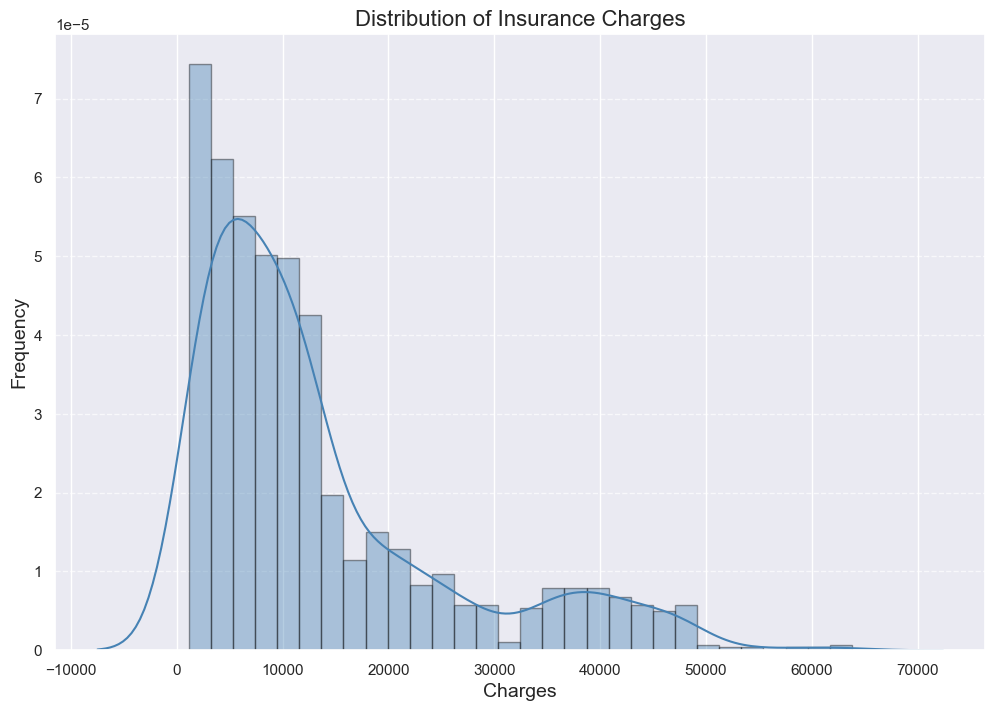

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(style='darkgrid')
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.distplot(df['charges'], kde=True, color='steelblue', hist_kws={'edgecolor': 'black'})

# Add a title and adjust labels
plt.title('Distribution of Insurance Charges', fontsize=16)
plt.xlabel('Charges', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


This distribution is right-skewed. To make it closer to normal we can apply natural log



This transformation is commonly applied when dealing with right-skewed distributions. Here's an explanation of why:

Symmetry: Applying the natural logarithm to a right-skewed distribution can help make the distribution more symmetric. Right-skewed distributions often have a long right tail, and taking the logarithm tends to compress the larger values, pulling in the tail and making the distribution more symmetric.

Stabilizing Variances: In some cases, taking the logarithm can stabilize the variances across different levels of the independent variable. This can be beneficial in statistical modeling, especially when you're dealing with data where the spread of values increases with the level of the independent variable.

Interpretability: When interpreting results in the context of linear models, taking the logarithm can make the effects of predictor variables more interpretable. For instance, in a linear regression, the coefficient for a variable after a log transformation represents the percentage change in the dependent variable for a one-unit change in the predictor.

Normality: Transforming data with the natural logarithm can also make the distribution more normal or close to normal. This can be advantageous in statistical analyses that assume normality, such as certain parametric tests or linear regression.

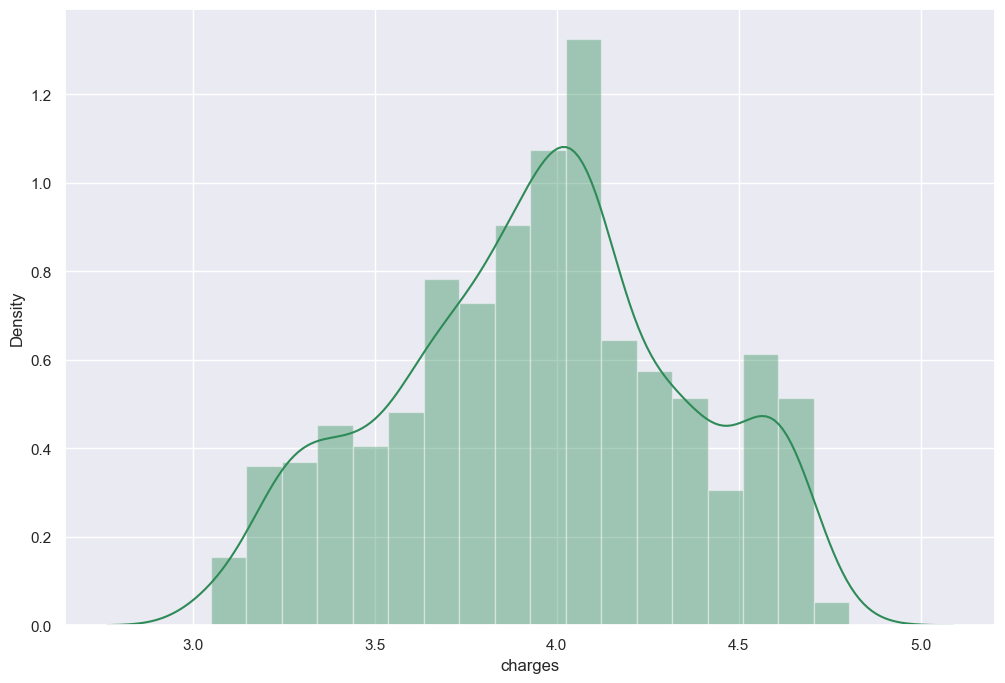

In [8]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.distplot(np.log10(df['charges']), kde = True, color = 'seagreen' )

Now let's look at the charges by region



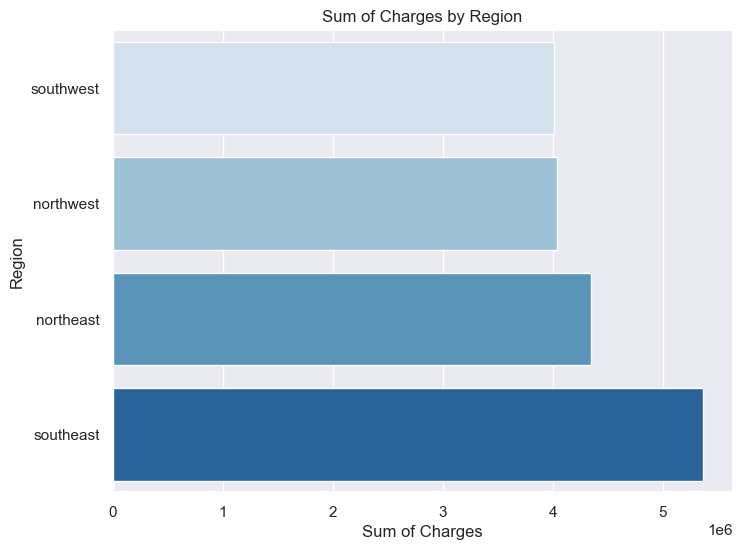

In [9]:
charges = df['charges'].groupby(df.region).sum().sort_values(ascending = True)
f, ax = plt.subplots(1, 1, figsize=(8, 6))
ax = sns.barplot(x=charges.values, y=charges.index, palette='Blues')
# Adding labels and title
plt.xlabel('Sum of Charges')
plt.ylabel('Region')
plt.title('Sum of Charges by Region')

# Show the plot
plt.show()

In [10]:
charges

region
southwest    4.012755e+06
northwest    4.035712e+06
northeast    4.343669e+06
southeast    5.363690e+06
Name: charges, dtype: float64

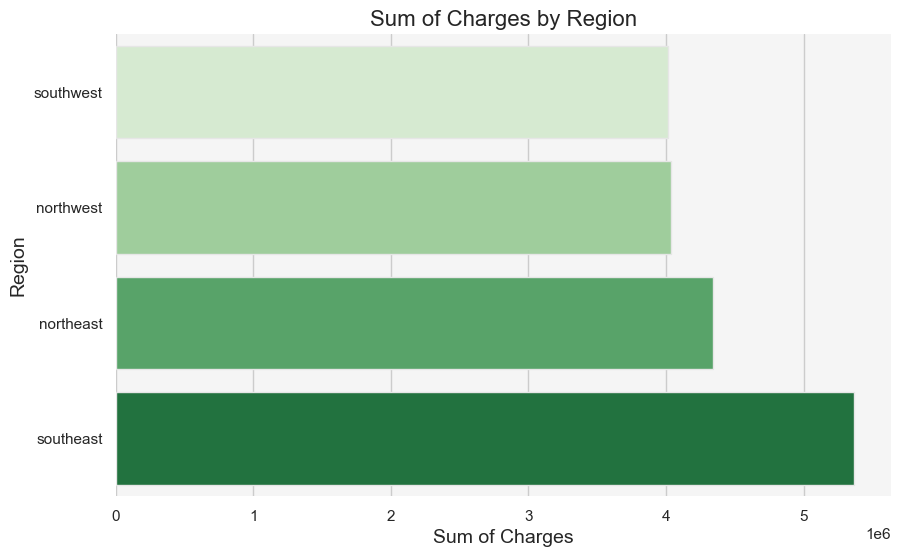

In [11]:

sns.set(style='whitegrid')

charges = df['charges'].groupby(df['region']).sum().sort_values(ascending=True)

color_palette = sns.color_palette("Greens", len(charges))

# Create a rounded-corner horizontal bar plot
f, ax = plt.subplots(figsize=(10, 6))
ax = sns.barplot(x=charges.values, y=charges.index, palette=color_palette, edgecolor=".9")

# Adding labels and title with a larger font size
plt.xlabel('Sum of Charges', fontsize=14)
plt.ylabel('Region', fontsize=14)
plt.title('Sum of Charges by Region', fontsize=16)

# Set a background color for the plot
ax.set_facecolor("#f5f5f5")

# Add a shadow to the plot for a raised effect
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(0)
ax.spines['left'].set_linewidth(0)

plt.show()


So overall the highest medical charges are in the Southeast and the lowest are in the Southwest. Taking into account certain factors (sex, smoking, having children) let's see how it changes by region



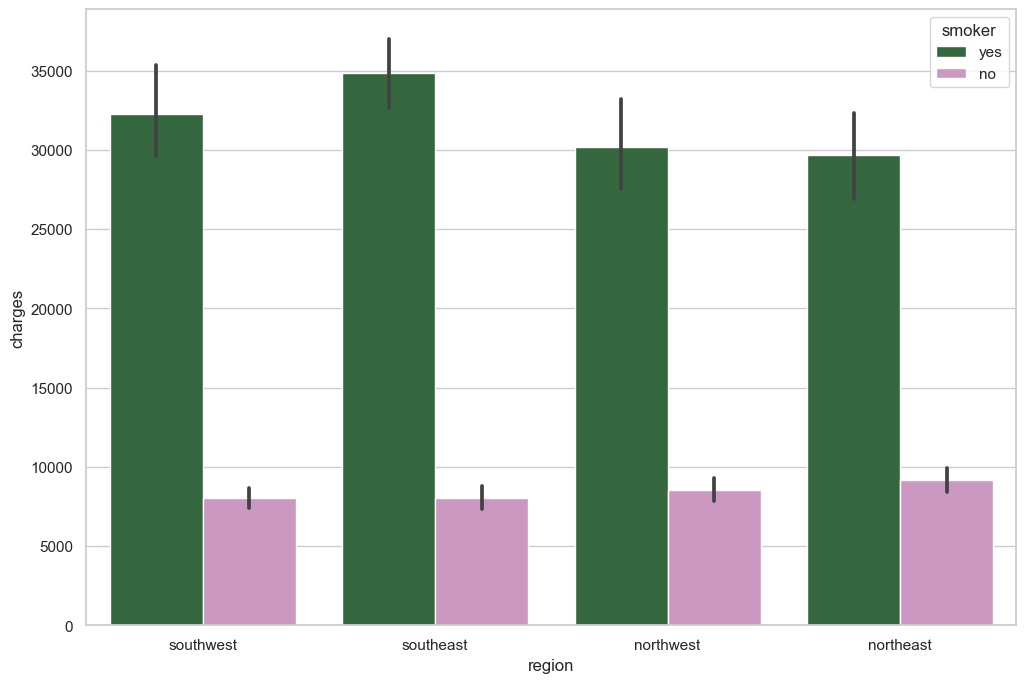

In [12]:
f, ax = plt.subplots(1,1, figsize=(12,8))
ax = sns.barplot(x = 'region', y = 'charges',
                 hue='smoker', data=df, palette='cubehelix')

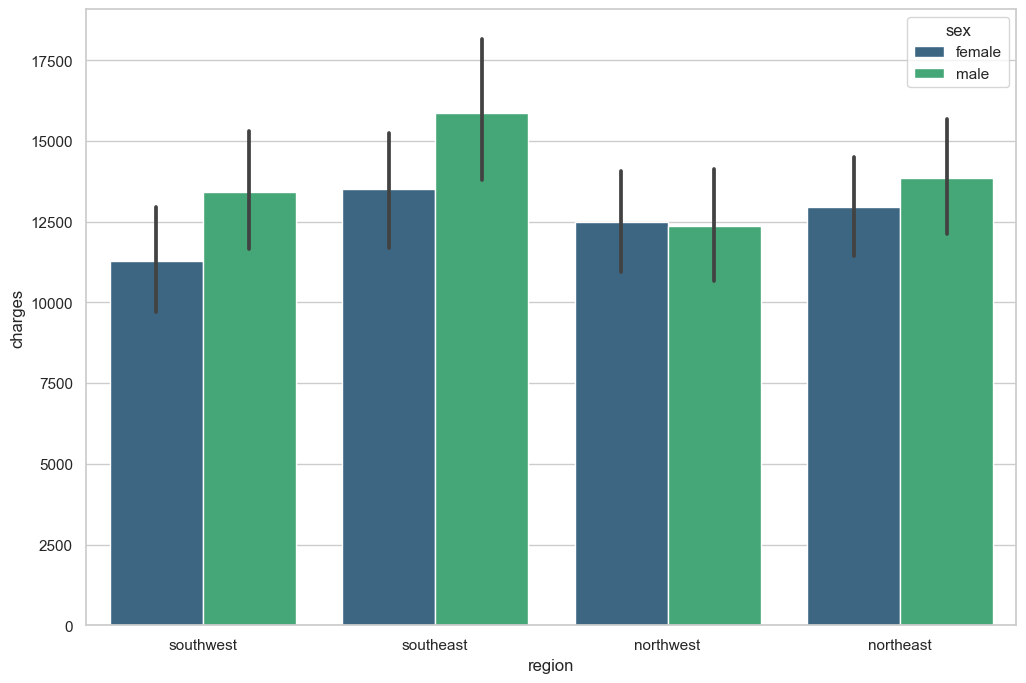

In [13]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='sex', data=df, palette='viridis')

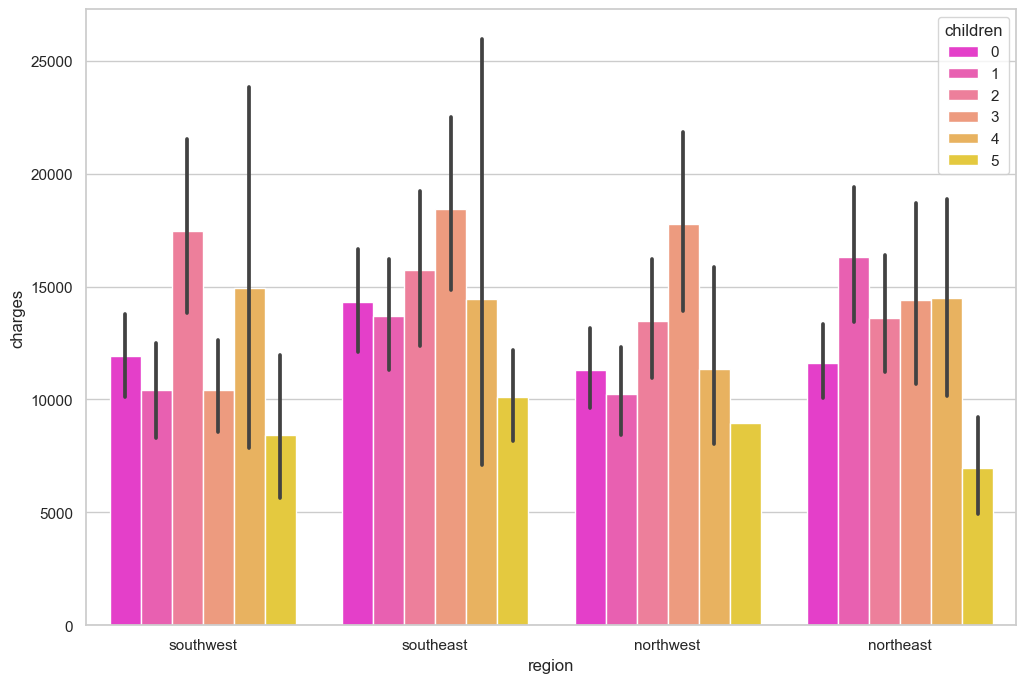

In [14]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='children', data=df, palette='spring')

Observing the bar plots, it is evident that the Southeast region exhibits the highest medical charges attributable to smoking, while the Northeast region demonstrates the lowest. Notably, individuals in the Southwest display a higher prevalence of smoking compared to those in the Northeast. However, despite higher smoking rates, individuals in the Northeast exhibit greater medical charges by gender when compared to those in the Southwest and Northwest regions collectively. Additionally, there is a discernible trend indicating that individuals with dependents tend to incur elevated medical expenses overall.

## Analysing the medical charges by age, bmi and children according to the smoking factor



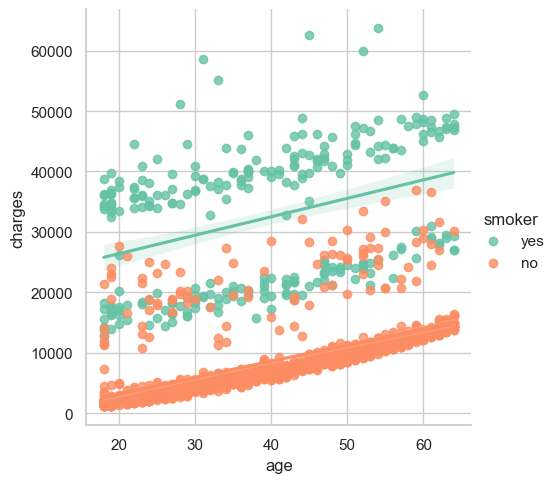

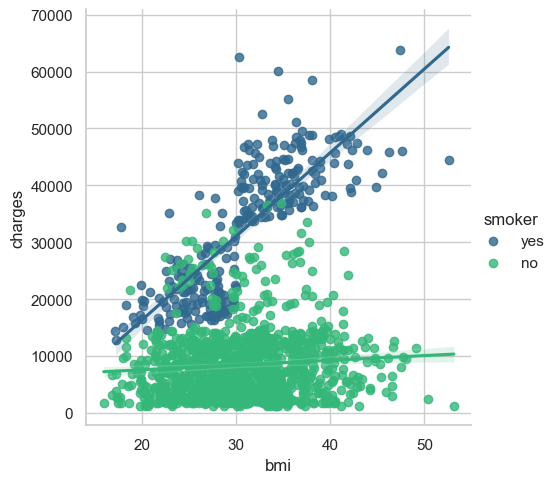

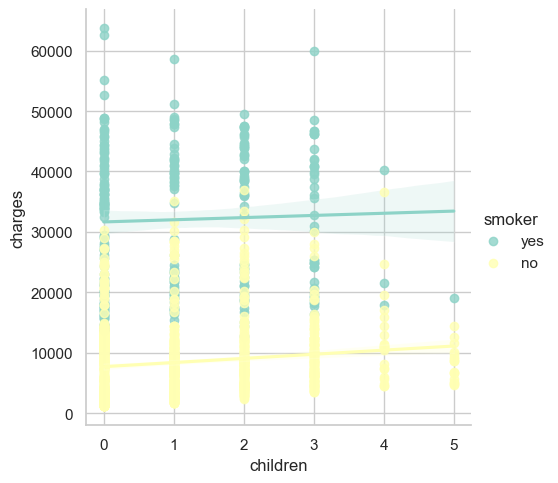

In [15]:
ax = sns.lmplot(x = 'age', y = 'charges', data=df, hue='smoker', palette='Set2')
ax = sns.lmplot(x = 'bmi', y = 'charges', data=df, hue='smoker', palette='viridis')
ax = sns.lmplot(x = 'children', y = 'charges', data=df, hue='smoker', palette='Set3')

Smoking has the highest impact on medical costs, even though the costs are growing with age, bmi and children. Also people who have children generally smoke less, which the following violinplots shows too



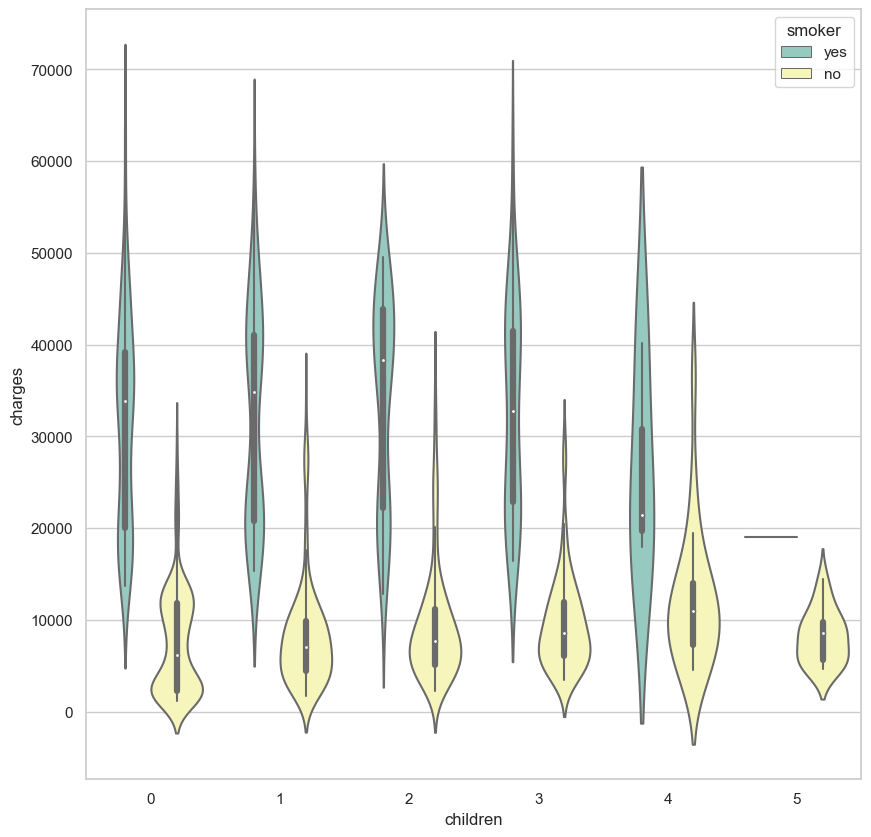

In [16]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.violinplot(x = 'children', y = 'charges', data=df,
                 orient='v', hue='smoker', palette='Set3')

The violin plot created using Seaborn depicts the distribution of medical charges in relation to the number of children an individual has, with a further breakdown based on smoking status. The horizontal axis represents the number of children (from 0 to a higher count), while the vertical axis represents the corresponding medical charges. The width of each violin plot at a given number of children reflects the density of data points, with wider sections indicating higher concentration. The plot is split into different hues, representing smokers and non-smokers, enabling a visual comparison of their respective distributions. The violin plot reveals insights into the variability and central tendency of medical charges across different child counts and smoking categories, providing a comprehensive view of the data distribution and potential relationships between the variables.

In [17]:
##Converting objects labels into categorical
df[['sex', 'smoker', 'region']] = df[['sex', 'smoker', 'region']].astype('category')
df.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [18]:
##Converting category labels into numerical using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(df.sex.drop_duplicates())
df.sex = label.transform(df.sex)
label.fit(df.smoker.drop_duplicates())
df.smoker = label.transform(df.smoker)
label.fit(df.region.drop_duplicates())
df.region = label.transform(df.region)
df.dtypes

age           int64
sex           int32
bmi         float64
children      int64
smoker        int32
region        int32
charges     float64
dtype: object

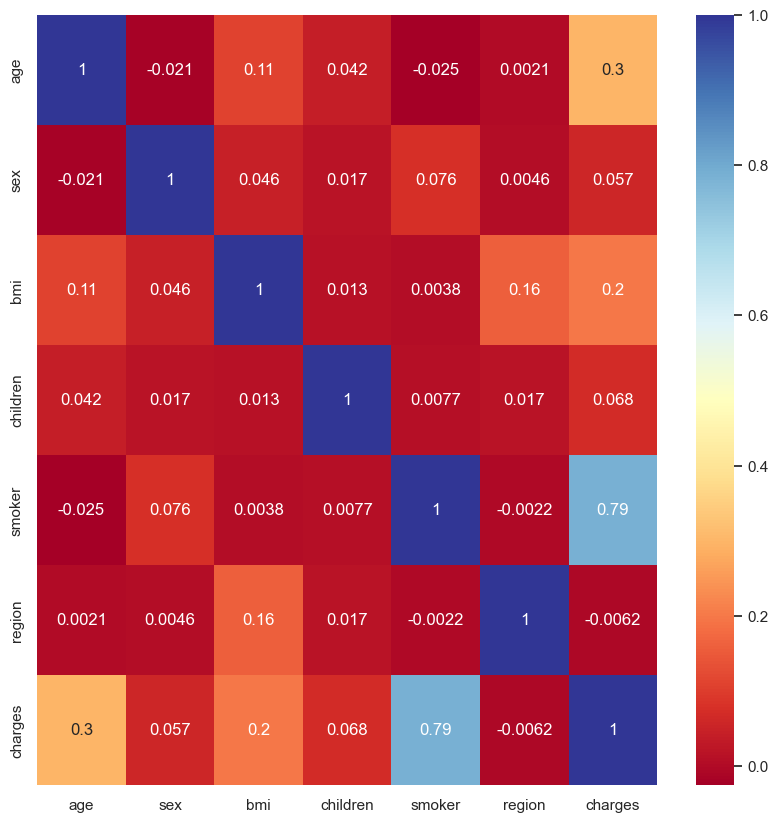

In [19]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.heatmap(df.corr(), annot=True, cmap='RdYlBu')

# Regression Model Comparison

## Linear Regression
Linear Regression is a straightforward and easily interpretable model, making it suitable for scenarios where the relationship between features and the target is linear. It is known for its fast training and prediction. However, it becomes prone to overfitting in high-dimensional data.

## Ridge Regression
Ridge Regression handles multicollinearity effectively and incorporates a regularization term to mitigate overfitting. It is a suitable choice when dealing with multicollinearity, striking a balance between simplicity and accuracy. Tuning is required for the introduced hyperparameter.

## Lasso Regression
Lasso Regression performs feature selection by setting some coefficients to zero, making it advantageous in scenarios where feature selection is crucial or when dealing with high-dimensional data. However, it may be sensitive to outliers.

## Random Forest Regressor
Random Forest Regressor excels in handling non-linearity and complex relationships. Its robustness to outliers and reduction of overfitting by averaging multiple decision trees make it suitable for datasets with intricate patterns. However, it is less interpretable and can be computationally expensive.

## Polynomial Regression
Polynomial Regression captures non-linear relationships and can model complex patterns. It is useful when the relationship between features and the target is not adequately captured by a simple linear model. However, it is prone to overfitting, especially with high-degree polynomials.


## Linear Regression



In [20]:
from sklearn.model_selection import train_test_split as holdout
from sklearn.linear_model import LinearRegression
from sklearn import metrics
x = df.drop(['charges'], axis = 1)
y = df['charges']
x_train, x_test, y_train, y_test = holdout(x, y, test_size=0.2, random_state=0)
Lin_reg = LinearRegression()
Lin_reg.fit(x_train, y_train)
print(Lin_reg.intercept_)
print(Lin_reg.coef_)
print(Lin_reg.score(x_test, y_test))

-11661.983908824417
[  253.99185244   -24.32455098   328.40261701   443.72929547
 23568.87948381  -288.50857254]
0.7998747145449959





## Ridge Regression



In [21]:
from sklearn.linear_model import Ridge
Ridge = Ridge(alpha=0.5)
Ridge.fit(x_train, y_train)
print(Ridge.intercept_)
print(Ridge.coef_)
print(Ridge.score(x_test, y_test))

-11643.440927495836
[ 2.53893751e+02 -2.15112284e+01  3.28339566e+02  4.44238477e+02
  2.35009674e+04 -2.89027871e+02]
0.7996989632063141


## Lasso Regression



In [23]:
from sklearn.linear_model import Lasso
Lasso = Lasso(alpha=0.2, fit_intercept=True, precompute=False, max_iter=1000,
              tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
Lasso.fit(x_train, y_train)
print(Lasso.intercept_)
print(Lasso.coef_)
print(Lasso.score(x_test, y_test))

-11661.838929039533
[ 2.53991436e+02 -2.34569821e+01  3.28389438e+02  4.43587436e+02
  2.35676136e+04 -2.88340296e+02]
0.7998690236224706


## Random Forest Regressor


In [33]:


from sklearn.ensemble import RandomForestRegressor as rfr
x = df.drop(['charges'], axis=1)
y = df.charges

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# Create and train the RandomForestRegressor
rfr_model = RandomForestRegressor(n_estimators=100, criterion='squared_error', random_state=1)
rfr_model.fit(x_train, y_train)

# Make predictions on the training and test sets
y_train_pred = rfr_model.predict(x_train)
y_test_pred = rfr_model.predict(x_test)

# Evaluate the model
mse_train = metrics.mean_squared_error(y_train, y_train_pred)
mse_test = metrics.mean_squared_error(y_test, y_test_pred)

r2_train = metrics.r2_score(y_train, y_train_pred)
r2_test = metrics.r2_score(y_test, y_test_pred)

# Print the results
print('MSE train data: %.3f, MSE test data: %.3f' % (mse_train, mse_test))
print('R2 train data: %.3f, R2 test data: %.3f' % (r2_train, r2_test))

MSE train data: 3471074.496, MSE test data: 21697204.279
R2 train data: 0.976, R2 test data: 0.855


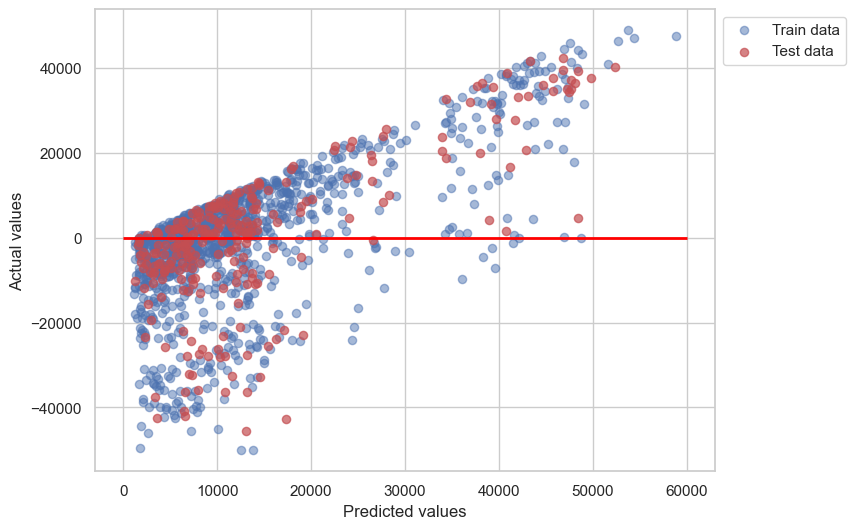

In [42]:
plt.figure(figsize=(8,6))

plt.scatter(x_train_pred, x_train_pred - y_train,
          c = 'b', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(x_test_pred, x_test_pred - y_test,
          c = 'r', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.legend(loc = 'upper right')
plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))


Feature importance ranking


1.smoker(0.601678)
2.bmi(0.218831)
3.age(0.136943)
4.children(0.020990)
5.region(0.015165)
6.sex(0.006393)


<BarContainer object of 6 artists>

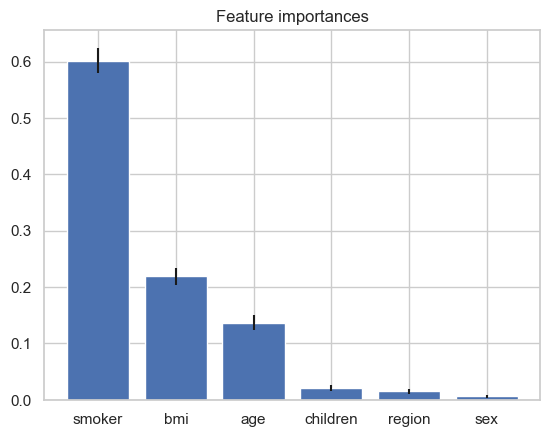

In [45]:
print('Feature importance ranking\n\n')
importances = Rfr.feature_importances_
std = np.std([tree.feature_importances_ for tree in Rfr.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
variables = ['age', 'sex', 'bmi', 'children','smoker', 'region']
importance_list = []
for f in range(x.shape[1]):
    variable = variables[indices[f]]
    importance_list.append(variable)
    print("%d.%s(%f)" % (f + 1, variable, importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(importance_list, importances[indices],
       color="b", yerr=std[indices], align="center")


## Polynomial Regression


In [46]:
from sklearn.preprocessing import PolynomialFeatures
x = df.drop(['charges', 'sex', 'region'], axis = 1)
y = df.charges
pol = PolynomialFeatures (degree = 2)
x_pol = pol.fit_transform(x)
x_train, x_test, y_train, y_test = holdout(x_pol, y, test_size=0.2, random_state=0)
Pol_reg = LinearRegression()
Pol_reg.fit(x_train, y_train)
y_train_pred = Pol_reg.predict(x_train)
y_test_pred = Pol_reg.predict(x_test)
print(Pol_reg.intercept_)
print(Pol_reg.coef_)
print(Pol_reg.score(x_test, y_test))

-5325.881705253554
[ 0.00000000e+00 -4.01606591e+01  5.23702019e+02  8.52025026e+02
 -9.52698471e+03  3.04430186e+00  1.84508369e+00  6.01720286e+00
  4.20849790e+00 -9.38983382e+00  3.81612289e+00  1.40840670e+03
 -1.45982790e+02 -4.46151855e+02 -9.52698471e+03]
0.8812595703345231


Intercept (-5325.88):

The intercept represents the estimated value of the target variable when all input features are zero. In this context, it's the predicted 'charges' when other factors are not considered.
Coefficients (Polynomial Regression Terms):

The coefficients represent the weights assigned to each term in the polynomial features. In your case, these terms include not only the original features but also the combinations of these features up to the second degree (degree=2).
For example, the coefficient for the term with index 1 corresponds to the linear term for the first feature, and the coefficient for the term with index 12 corresponds to the interaction term between the first and second features.
R² Score (0.881):

The R² score is a measure of how well the model explains the variance in the target variable. In this case, the value of 0.881 indicates that around 88.1% of the variance in the 'charges' can be explained by the polynomial regression model.
In simple terms, the model has learned a polynomial relationship between the input features and the target variable. The intercept and coefficients provide information about the baseline prediction and the importance of each term in the polynomial equation. The high R² score suggests that the model fits the data well, capturing a significant portion of the variability in the charges based on the given features.

In [47]:
##Evaluating the performance of the algorithm
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error: 2824.495045477636
Mean Squared Error: 18895160.098780356
Root Mean Squared Error: 4346.856346692442


In [48]:
##Predicting the charges
y_test_pred = Pol_reg.predict(x_test)
##Comparing the actual output values with the predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
df

,Actual,Predicted
578,9724.53000,12101.156323
610,8547.69130,10440.782266
569,45702.02235,48541.022951
1034,12950.07120,14140.067522
198,9644.25250,8636.235727
...,...,...
1084,15019.76005,16712.196281
726,6664.68595,8654.565461
1132,20709.02034,12372.050609
725,40932.42950,41465.617268


Conclusion: like we previously noticed smoking is the greatest factor that affects medical cost charges, then it's bmi and age. Polynomial Regression turned out to be the best model